In [58]:
import pandas as pd
pd.set_option('display.max_columns', 50)

from scipy.stats import zscore
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('raw_data.csv', sep=',')

# Feature Normalization

Features are normalized using both min-max normalization and Z-score normalization - the resulting principal components and model results will be compared using each method

### Min-Max Normalization

In [4]:
min_max_features = (df.iloc[:,1:]-df.iloc[:,1:].min())/(df.iloc[:,1:].max() - df.iloc[:,1:].min())
min_max_features.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,TimbreAvg11,TimbreAvg12,TimbreVariance1,TimbreVariance2,TimbreVariance3,TimbreVariance4,TimbreVariance5,TimbreVariance6,TimbreVariance7,TimbreVariance8,TimbreVariance9,TimbreVariance10,TimbreVariance11,TimbreVariance12,TimbreCovariance1,...,TimbreCovariance42,TimbreCovariance43,TimbreCovariance44,TimbreCovariance45,TimbreCovariance46,TimbreCovariance47,TimbreCovariance48,TimbreCovariance49,TimbreCovariance50,TimbreCovariance51,TimbreCovariance52,TimbreCovariance53,TimbreCovariance54,TimbreCovariance55,TimbreCovariance56,TimbreCovariance57,TimbreCovariance58,TimbreCovariance59,TimbreCovariance60,TimbreCovariance61,TimbreCovariance62,TimbreCovariance63,TimbreCovariance64,TimbreCovariance65,TimbreCovariance66
0,0.800293,0.497205,0.599629,0.332545,0.370583,0.276962,0.452564,0.302498,0.492380,0.384046,0.462913,0.504117,0.018326,0.009169,0.025271,0.021370,0.019988,0.022476,0.025813,0.024244,0.025518,0.046368,0.014011,0.017742,0.577498,...,0.525710,0.369909,0.358869,0.268789,0.570119,0.637320,0.591065,0.797381,0.527131,0.517249,0.488206,0.494623,0.374440,0.613897,0.564795,0.352499,0.490087,0.372344,0.644339,0.569286,0.460524,0.613453,0.334855,0.500338,0.362200
1,0.780177,0.492987,0.595220,0.341113,0.386532,0.229635,0.546232,0.359274,0.532466,0.453276,0.455925,0.518710,0.080521,0.031166,0.015877,0.013809,0.038532,0.024374,0.061158,0.037664,0.032428,0.069545,0.020152,0.031828,0.583226,...,0.532212,0.341306,0.354961,0.271347,0.549077,0.644865,0.605739,0.799499,0.523887,0.527176,0.479701,0.490812,0.374383,0.616226,0.553138,0.346752,0.494001,0.367177,0.650031,0.550999,0.459186,0.613745,0.354687,0.506122,0.385477
2,0.817124,0.511606,0.571964,0.342073,0.394968,0.254988,0.512831,0.352096,0.522585,0.421927,0.459199,0.521392,0.013342,0.010514,0.027036,0.018102,0.017306,0.029827,0.030962,0.029372,0.011049,0.039493,0.020506,0.019792,0.578355,...,0.530215,0.364734,0.360288,0.265171,0.565559,0.657363,0.596518,0.794380,0.537608,0.508635,0.488905,0.493404,0.367351,0.611697,0.567840,0.344695,0.499157,0.350453,0.643421,0.567316,0.470228,0.587814,0.337376,0.504859,0.359438
3,0.772129,0.464800,0.540674,0.319971,0.411973,0.224074,0.535929,0.311991,0.476686,0.345849,0.483895,0.498422,0.068242,0.032948,0.018378,0.013866,0.036801,0.013300,0.030979,0.025389,0.024943,0.043409,0.013773,0.014865,0.595340,...,0.526723,0.342911,0.348207,0.261808,0.567307,0.629552,0.607457,0.800495,0.536978,0.506581,0.472569,0.503414,0.375816,0.617261,0.570105,0.369357,0.476865,0.357216,0.631499,0.546663,0.475993,0.593813,0.351622,0.515629,0.377862
4,0.817341,0.525963,0.590047,0.331972,0.374082,0.261984,0.487309,0.316833,0.509999,0.417425,0.452057,0.528889,0.085854,0.013477,0.021433,0.009454,0.021300,0.019974,0.026469,0.033120,0.019191,0.059500,0.013487,0.020943,0.580377,...,0.529866,0.353790,0.358033,0.251335,0.559298,0.645705,0.597049,0.803361,0.515787,0.527991,0.486719,0.492467,0.376625,0.617141,0.556456,0.350082,0.489912,0.373525,0.637490,0.564964,0.462806,0.611127,0.348736,0.505936,0.387203


### Z-score Normalization 

In [6]:
z_features = df.iloc[:,1:].apply(zscore)
z_features.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,TimbreAvg11,TimbreAvg12,TimbreVariance1,TimbreVariance2,TimbreVariance3,TimbreVariance4,TimbreVariance5,TimbreVariance6,TimbreVariance7,TimbreVariance8,TimbreVariance9,TimbreVariance10,TimbreVariance11,TimbreVariance12,TimbreCovariance1,...,TimbreCovariance42,TimbreCovariance43,TimbreCovariance44,TimbreCovariance45,TimbreCovariance46,TimbreCovariance47,TimbreCovariance48,TimbreCovariance49,TimbreCovariance50,TimbreCovariance51,TimbreCovariance52,TimbreCovariance53,TimbreCovariance54,TimbreCovariance55,TimbreCovariance56,TimbreCovariance57,TimbreCovariance58,TimbreCovariance59,TimbreCovariance60,TimbreCovariance61,TimbreCovariance62,TimbreCovariance63,TimbreCovariance64,TimbreCovariance65,TimbreCovariance66
0,1.080575,0.391265,1.826532,0.464657,-0.474730,-0.278204,-1.552371,-1.310845,0.387704,-0.666166,0.793414,-0.584275,-1.056103,-1.045093,-0.805912,-0.747368,-1.055262,-0.858844,-0.873144,-0.903356,-0.666024,-0.836212,-1.008012,-0.734829,-0.423683,...,-0.279650,0.015447,0.371165,-0.035078,0.186311,-0.112104,-0.200706,0.115638,0.302385,0.200496,-0.012610,0.040941,-0.113944,0.251836,0.106465,-0.085335,0.108508,0.142775,-0.237355,0.049233,-0.356182,0.544458,-0.470599,-0.255977,0.042292
1,0.880919,0.332292,1.748539,0.721828,-0.164945,-1.191173,0.765681,0.109626,1.420941,0.414950,0.541252,-0.265139,0.479611,-0.218605,-1.079941,-0.967624,-0.281324,-0.803477,0.449577,-0.488505,-0.355738,-0.317769,-0.786935,0.165365,-0.193934,...,0.092991,-0.916031,0.125195,0.137927,-0.797342,0.218263,0.548457,0.251739,0.125429,0.609536,-0.483539,-0.241197,-0.116109,0.409042,-0.692585,-0.314250,0.306236,-0.069483,0.052017,-0.632328,-0.436057,0.556448,0.568744,0.206940,1.158587
2,1.247622,0.592600,1.337173,0.750657,-0.001110,-0.702100,-0.060914,-0.069956,1.166254,-0.074608,0.659382,-0.206489,-1.179183,-0.994540,-0.754449,-0.842576,-1.167197,-0.644427,-0.680438,-0.744836,-1.315763,-0.990010,-0.774182,-0.603851,-0.389326,...,-0.021442,-0.153067,0.460456,-0.279680,-0.026845,0.765419,0.077703,-0.077183,0.873971,-0.154506,0.026094,-0.049322,-0.381945,0.103323,0.315248,-0.396186,0.566683,-0.756534,-0.284019,-0.024220,0.223128,-0.509789,-0.338457,0.105819,-0.090208
3,0.801044,-0.061805,0.783683,0.087218,0.329180,-1.298429,0.510714,-1.073355,-0.016803,-1.262655,1.550430,-0.708817,0.176411,-0.151642,-1.006990,-0.965945,-0.353561,-1.126500,-0.679815,-0.867950,-0.691843,-0.902406,-1.016593,-0.918716,0.292010,...,-0.221554,-0.863781,-0.299885,-0.507121,0.054858,-0.452187,0.636184,0.315799,0.839595,-0.239151,-0.878425,0.691674,-0.061946,0.478975,0.470511,0.586237,-0.559427,-0.478689,-0.890161,-0.793906,0.567269,-0.263107,0.408116,0.967862,0.793384
4,1.249775,0.793334,1.657037,0.447460,-0.406775,-0.567138,-0.692498,-0.952197,0.841844,-0.144910,0.401697,-0.042527,0.611278,-0.883220,-0.917862,-1.094474,-1.000481,-0.931815,-0.848601,-0.628978,-0.950142,-0.542465,-1.026901,-0.530277,-0.308223,...,-0.041466,-0.509481,0.318540,-1.215231,-0.319524,0.255035,0.104808,0.499948,-0.316517,0.643128,-0.094951,-0.118654,-0.031379,0.470837,-0.465125,-0.181585,0.099672,0.191319,-0.585576,-0.111877,-0.219960,0.448804,0.256882,0.192038,1.241363


# Discretize Target Variable into Decades

First, classification models to predict the decade a song was released will be developed

Text(0.5,1,'Frequency Distribution by Decade')

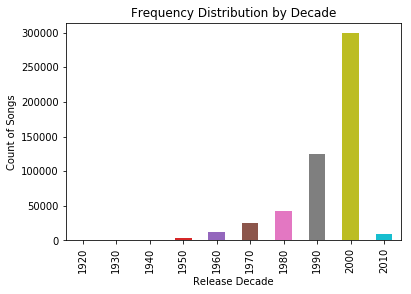

In [28]:
# Group release years into decades
decades = df['Year released'].apply(lambda year : year-(year%10)).rename('Decade released')

min_max_df = pd.concat([decades,min_max_features],axis=1) #construct the full dataframe of decades & min-max data
z_df = pd.concat([decades,z_features], axis=1) #construct the full dataframe of decades of z-score data

# #plot the distribution of observations by decade
decades.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Release Decade")
plt.ylabel("Count of Songs")
plt.title("Frequency Distribution by Decade")

# Downsample Data to Balance Classes

Class imbalances are usually detrimental to classification models, so the data from majority decades will be downsampled. Removed data from before 1970 and after 2010 for now - the years in between contain the bulk of the data

In [36]:
min_max_trimmed = min_max_df[min_max_df['Decade released']>=1970] #filter out songs released before 1970
min_max_trimmed = min_max_trimmed[min_max_trimmed['Decade released']<2010] #filter out songs released after 2010

z_trimmed = z_df[z_df['Decade released']>=1970] #filter out songs released before 1970
z_trimmed = z_trimmed[z_trimmed['Decade released']<2010] #filter out songs released after 2010

In [40]:
print(z_trimmed.groupby('Decade released').size())
print('\n')
print('There are 24,745 observations from the 1970s.')
print('Downsample other decades to this number of observations')

Decade released
1970     24745
1980     41814
1990    124713
2000    299003
dtype: int64


There are 24,745 observations from the 1970s.
Downsample other decades to this number of observations


Text(0.5,1,'Trimmed & Downsampled Data')

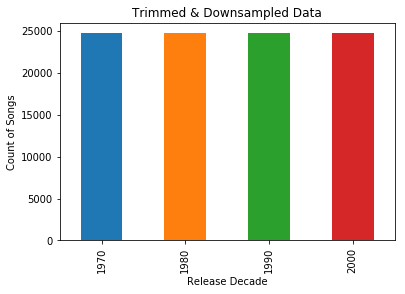

In [57]:
rows1970 = min_max_trimmed.loc[min_max_trimmed['Decade released'] == 1970]
rows1980 = min_max_trimmed.loc[min_max_trimmed['Decade released'] == 1980].sample(len(rows1970))
rows1990 = min_max_trimmed.loc[min_max_trimmed['Decade released'] == 1990].sample(len(rows1970))
rows2000 = min_max_trimmed.loc[min_max_trimmed['Decade released'] == 2000].sample(len(rows1970))
min_max_sampled = pd.concat([rows1970,rows1980,rows1990,rows2000],axis=0)
min_max_sampled = min_max_sampled.sample(frac=1).reset_index(drop=True) #shuffle rows to randomize


rows1970 = z_trimmed.loc[z_trimmed['Decade released'] == 1970]
rows1980 = z_trimmed.loc[z_trimmed['Decade released'] == 1980].sample(len(rows1970))
rows1990 = z_trimmed.loc[z_trimmed['Decade released'] == 1990].sample(len(rows1970))
rows2000 = z_trimmed.loc[z_trimmed['Decade released'] == 2000].sample(len(rows1970))
z_sampled = pd.concat([rows1970,rows1980,rows1990,rows2000],axis=0)
z_sampled = z_sampled.sample(frac=1).reset_index(drop=True) #shuffle rows to randomize

z_sampled['Decade released'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Release Decade")
plt.ylabel("Count of Songs")
plt.title("Trimmed & Downsampled Data")

# Principal Component Analysis

### Using Z score data (preferred to min-max)

Text(0.5,1,'Scree Plot')

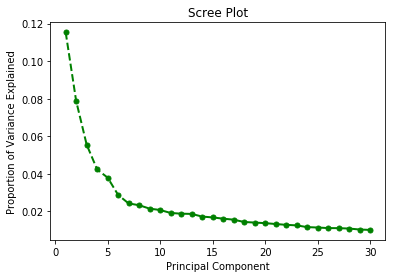

In [88]:
z_features = z_sampled.iloc[:,1:]

n_components = 30
pca = PCA(n_components=n_components)
z_prinComps = pca.fit_transform(z_features)

col_names = []
for i in range(1,n_components+1):
    col_names.append('PrinComp' + str(i))
z_prinComp_df = pd.DataFrame(data = z_prinComps, columns = col_names) #create a dataframe of the resulting pca data
z_prinComp_df['Decade released'] = z_sampled['Decade released']

# print('Proportion of explained variance for each principal component:')
explained_variance = pca.explained_variance_ratio_
# print(explained_variance)
idxs = list(range(1,n_components+1))
plt.plot(idxs, list(explained_variance), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot")

Text(0.5,1,'Explained Variance')

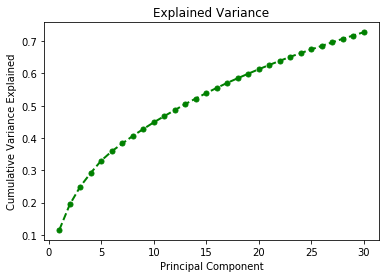

In [84]:
# print('Cumulative explained variance:')
# print(pca.explained_variance_ratio_.cumsum())
cum_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(idxs, list(cum_variance), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")
plt.title("Explained Variance")

### Using Min Max Data 

Text(0.5,1,'Scree Plot')

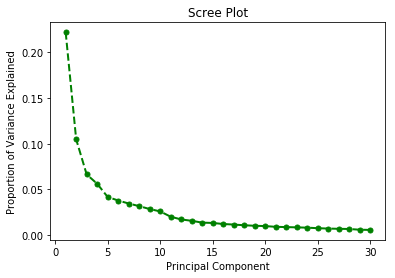

In [89]:
min_max_features = min_max_sampled.iloc[:,1:]

n_components = 30
pca = PCA(n_components=n_components)
min_max_prinComps = pca.fit_transform(min_max_features)

col_names = []
for i in range(1,n_components+1):
    col_names.append('PrinComp' + str(i))
min_max_prinComp_df = pd.DataFrame(data = min_max_prinComps, columns = col_names) #create a dataframe of the resulting pca data
min_max_prinComp_df['Decade released'] = min_max_sampled['Decade released']

# print('Proportion of explained variance for each principal component:')
explained_variance = pca.explained_variance_ratio_
# print(explained_variance)
idxs = list(range(1,n_components+1))
plt.plot(idxs, list(explained_variance), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot")

Text(0.5,1,'Explained Variance')

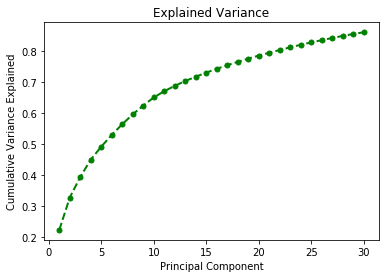

In [86]:
# print('Cumulative explained variance:')
# print(pca.explained_variance_ratio_.cumsum())
cum_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(idxs, list(cum_variance), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")
plt.title("Explained Variance")

# Write clean data to CSV

In [90]:
z_sampled.to_csv('z_sampled.csv', index=False) #downsampled Z score data without PCA
z_prinComp_df.to_csv('z_pca.csv',index=False) #downsampled Z score PCA data

min_max_sampled.to_csv('min_max_sampled.csv', index=False) #downsampled min-max data without PCA
min_max_prinComp_df.to_csv('min_max_pca.csv', index=False) #downsampled min-max PCA data